#**Name:** Varsha
#**Roll No:** 200030040

##**AIM**


*  To understand and apply k-means clustering
*  To understand elbow curve and optimal number of clusters for k-means clustering
*  To understand and perform vector quantization



## **THEORY**:
K - MEANS:
K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into distinct, non-overlapping subgroups or clusters. These clusters are defined based on the similarity of data points within each cluster and the dissimilarity between clusters.

Elbow method for optimal K:
The elbow method is a common technique used to determine the optimal number of clusters (K) for a K-means clustering algorithm. The idea behind the elbow method is to run K-means clustering on the dataset for a range of values of K and, for each value of K, calculate the sum of squared distances (SSD) between data points and their assigned cluster centroids. Then, you plot the SSD as a function of K and look for an "elbow" point on the graph. The point where the SSD starts to decrease at a slower rate (forming an elbow-like bend in the plot) is considered to be the optimal K value.

Vector quantization:
In VQ, a codebook is generated, which consists of a set of code vectors or codewords. These codewords represent the quantization levels that the data will be mapped to. The codebook can be created in various ways, such as through clustering algorithms like K-means or using optimized techniques like the Linde-Buzo-Gray (LBG) algorithm.

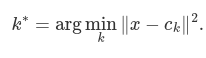

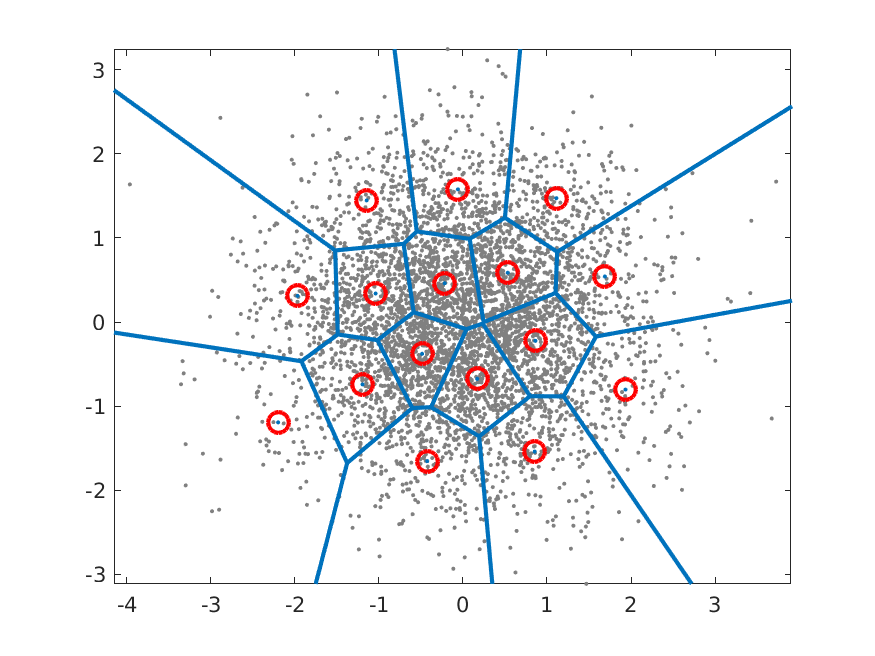



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df_2d = pd.read_csv('2D_formants.csv')
df_3d = pd.read_csv('3D_formants.csv')

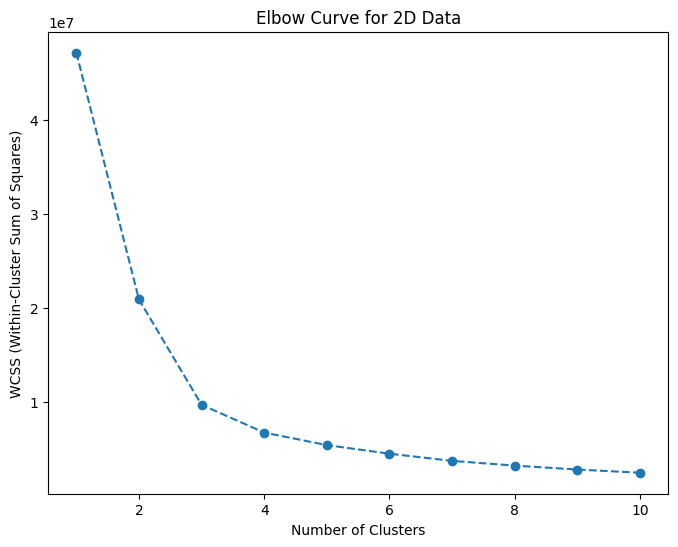

In [ ]:
wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init = 10)
    kmeans.fit(df_2d)
    wcss_2d.append(kmeans.inertia_)

# Plot the elbow curve for 2D data
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Curve for 2D Data')
plt.show()

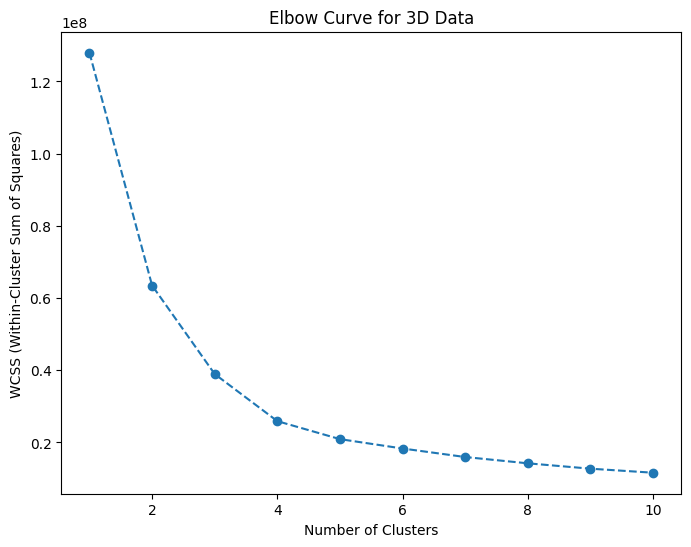

In [ ]:
wcss_3d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init = 10)
    kmeans.fit(df_3d)
    wcss_3d.append(kmeans.inertia_)

# Plot the elbow curve for 3D data
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_3d, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Curve for 3D Data')
plt.show()

In [ ]:
df_2d_k_3 = df_2d.copy()
df_2d_k_4 = df_2d.copy()
df_3d_k_3 = df_3d.copy()
df_3d_k_4 = df_3d.copy()

In [ ]:
# Perform K-means clustering with 4 clusters for 2D data
kmeans_2d = KMeans(n_clusters=3, init='k-means++', random_state=42,n_init = 10)
df_2d_k_3['Cluster'] = kmeans_2d.fit_predict(df_2d_k_3)

# Perform K-means clustering with 4 clusters for 3D data
kmeans_3d = KMeans(n_clusters=4, init='k-means++', random_state=42,n_init = 10)
df_3d_k_3['Cluster'] = kmeans_3d.fit_predict(df_3d_k_3)

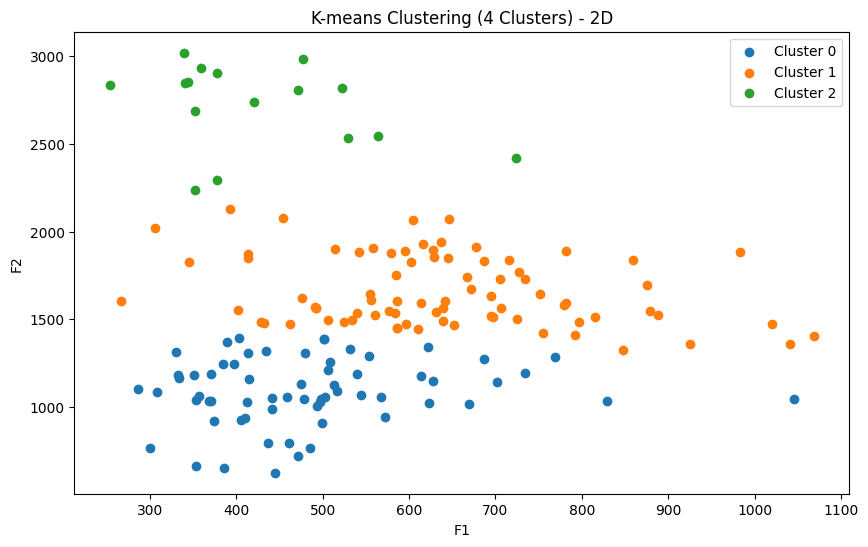

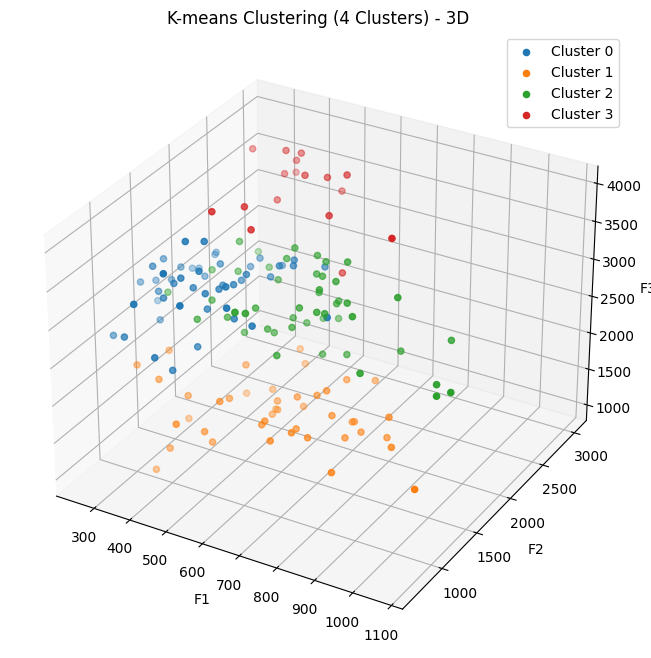

In [ ]:
# Visualize the results in 2D
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(df_2d_k_3[df_2d_k_3['Cluster'] == cluster]['F1'], df_2d_k_3[df_2d_k_3['Cluster'] == cluster]['F2'], label=f'Cluster {cluster}')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('K-means Clustering (4 Clusters) - 2D')
plt.legend()
plt.show()

# Visualize the results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(4):
    ax.scatter(df_3d_k_3[df_3d_k_3['Cluster'] == cluster]['F1'], df_3d_k_3[df_3d_k_3['Cluster'] == cluster]['F2'], df_3d_k_3[df_3d_k_3['Cluster'] == cluster]['F3'], label=f'Cluster {cluster}')
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
ax.set_title('K-means Clustering (4 Clusters) - 3D')
ax.legend()
plt.show()

In [ ]:
# Perform K-means clustering with 4 clusters for 2D data
kmeans_2d_4 = KMeans(n_clusters=4, init='k-means++', random_state=42,n_init = 10)
df_2d_k_4['Cluster'] = kmeans_2d_4.fit_predict(df_2d_k_4)

# Perform K-means clustering with 4 clusters for 3D data
kmeans_3d_4 = KMeans(n_clusters=4, init='k-means++', random_state=42,n_init = 10)
df_3d_k_4['Cluster'] = kmeans_3d_4.fit_predict(df_3d_k_4)

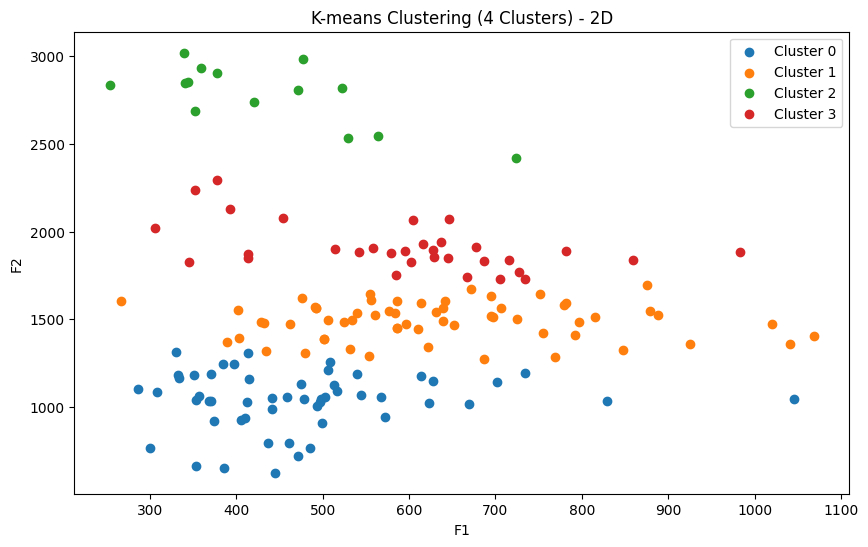

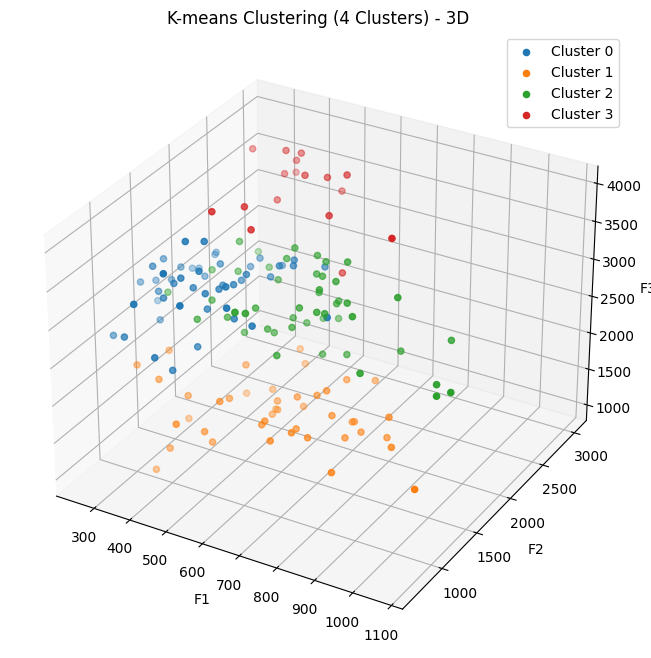

In [ ]:
# Visualize the results in 2D
plt.figure(figsize=(10, 6))
for cluster in range(4):
    plt.scatter(df_2d_k_4[df_2d_k_4['Cluster'] == cluster]['F1'], df_2d_k_4[df_2d_k_4['Cluster'] == cluster]['F2'], label=f'Cluster {cluster}')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('K-means Clustering (4 Clusters) - 2D')
plt.legend()
plt.show()

# Visualize the results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(4):
    ax.scatter(df_3d_k_4[df_3d_k_4['Cluster'] == cluster]['F1'], df_3d_k_4[df_3d_k_4['Cluster'] == cluster]['F2'], df_3d_k_4[df_3d_k_4['Cluster'] == cluster]['F3'], label=f'Cluster {cluster}')
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
ax.set_title('K-means Clustering (4 Clusters) - 3D')
ax.legend()
plt.show()

In [ ]:
# Define the number of clusters (P)
P = 4

# Perform VQ clustering on 2D data
vq_2d = MiniBatchKMeans(n_clusters=P, random_state=42)
df_2d['VQ_Cluster'] = vq_2d.fit_predict(df_2d)

# Perform VQ clustering on 3D data
vq_3d = MiniBatchKMeans(n_clusters=P, random_state=42)
df_3d['VQ_Cluster'] = vq_3d.fit_predict(df_3d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


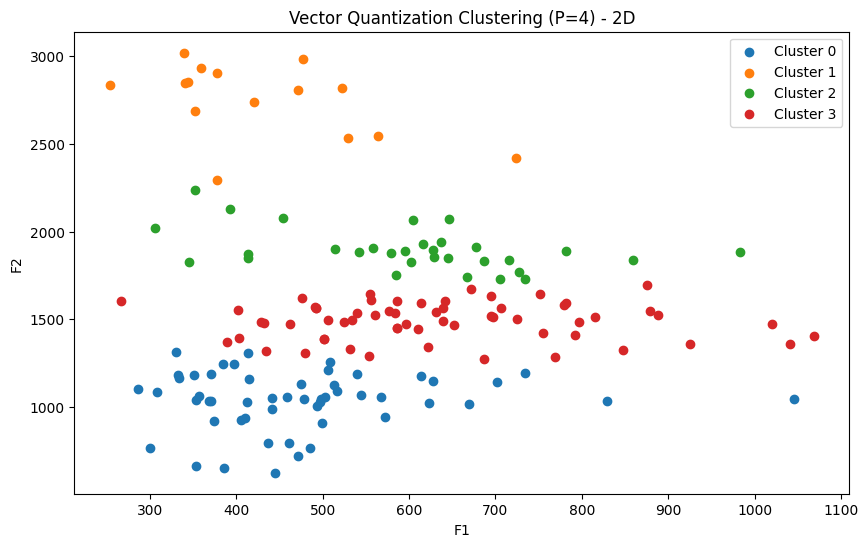

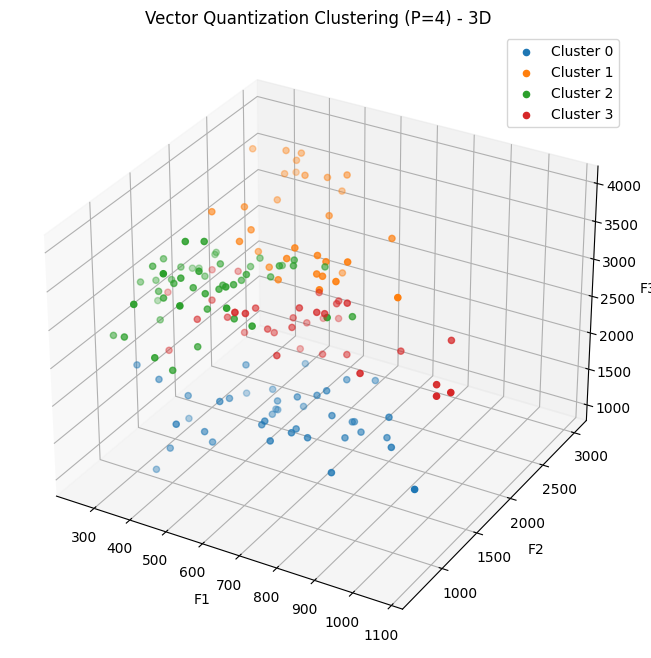

In [ ]:
# Visualize the VQ clusters in 2D
plt.figure(figsize=(10, 6))
for cluster in range(P):
    plt.scatter(df_2d[df_2d['VQ_Cluster'] == cluster]['F1'], df_2d[df_2d['VQ_Cluster'] == cluster]['F2'], label=f'Cluster {cluster}')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Vector Quantization Clustering (P=4) - 2D')
plt.legend()
plt.show()

# Visualize the VQ clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(P):
    ax.scatter(df_3d[df_3d['VQ_Cluster'] == cluster]['F1'], df_3d[df_3d['VQ_Cluster'] == cluster]['F2'], df_3d[df_3d['VQ_Cluster'] == cluster]['F3'], label=f'Cluster {cluster}')
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
ax.set_title('Vector Quantization Clustering (P=4) - 3D')
ax.legend()
plt.show()

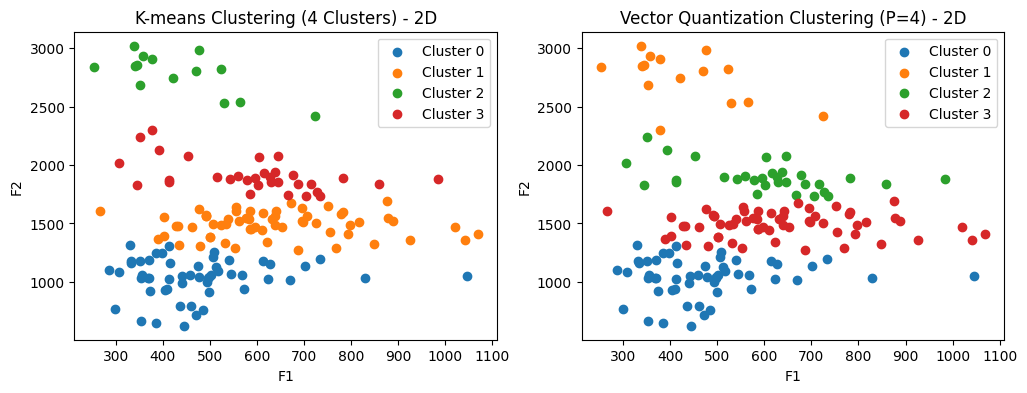

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot K-means Clustering (4 Clusters) - 2D in the first subplot (ax1)
for cluster in range(4):
    ax1.scatter(df_2d_k_4[df_2d_k_4['Cluster'] == cluster]['F1'], df_2d_k_4[df_2d_k_4['Cluster'] == cluster]['F2'], label=f'Cluster {cluster}')
ax1.set_xlabel('F1')
ax1.set_ylabel('F2')
ax1.set_title('K-means Clustering (4 Clusters) - 2D')
ax1.legend()

# Plot Vector Quantization Clustering (P=4) - 2D in the second subplot (ax2)
for cluster in range(P):
    ax2.scatter(df_2d[df_2d['VQ_Cluster'] == cluster]['F1'], df_2d[df_2d['VQ_Cluster'] == cluster]['F2'], label=f'Cluster {cluster}')
ax2.set_xlabel('F1')
ax2.set_ylabel('F2')
ax2.set_title('Vector Quantization Clustering (P=4) - 2D')
ax2.legend()

# Display both subplots side by side
plt.show()

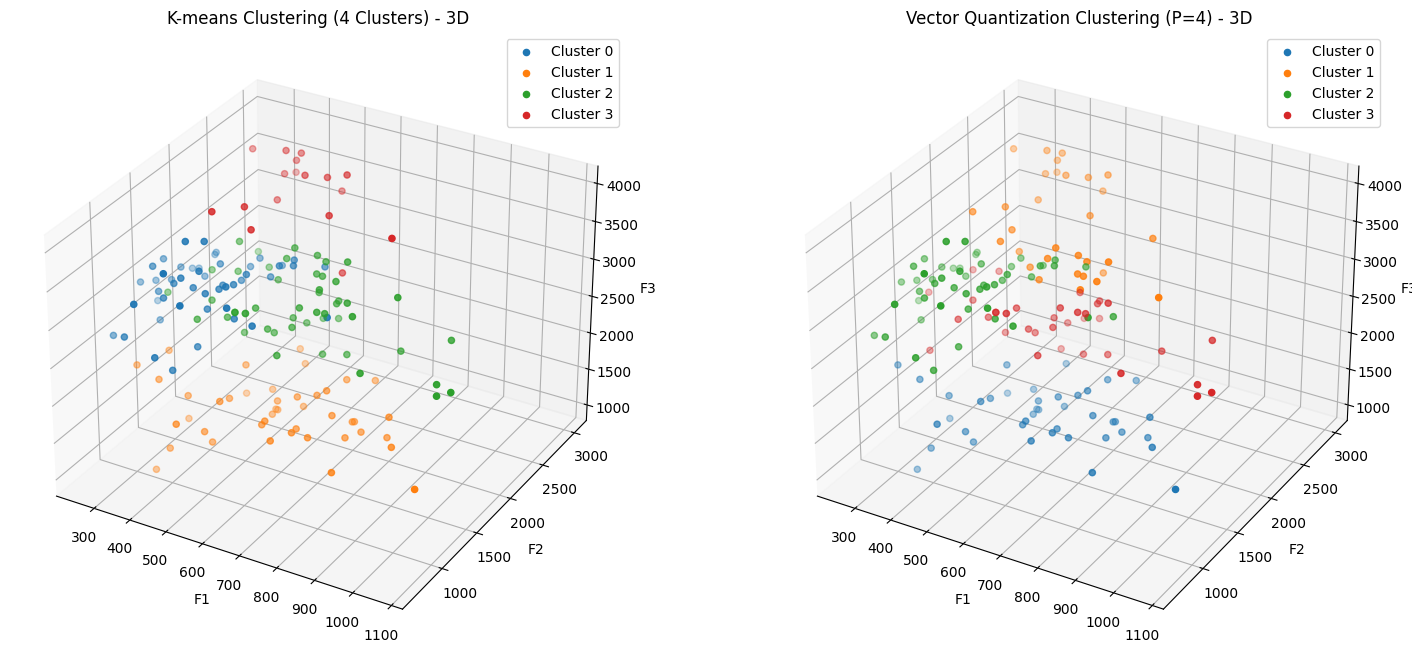

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': '3d'})

# Plot K-means Clustering (4 Clusters) - 3D in the first subplot (ax1)
for cluster in range(4):
    ax1.scatter(df_3d_k_4[df_3d_k_4['Cluster'] == cluster]['F1'], df_3d_k_4[df_3d_k_4['Cluster'] == cluster]['F2'], df_3d_k_4[df_3d_k_4['Cluster'] == cluster]['F3'], label=f'Cluster {cluster}')
ax1.set_xlabel('F1')
ax1.set_ylabel('F2')
ax1.set_zlabel('F3')
ax1.set_title('K-means Clustering (4 Clusters) - 3D')
ax1.legend()

# Plot Vector Quantization Clustering (P=4) - 3D in the second subplot (ax2)
for cluster in range(P):
    ax2.scatter(df_3d[df_3d['VQ_Cluster'] == cluster]['F1'], df_3d[df_3d['VQ_Cluster'] == cluster]['F2'], df_3d[df_3d['VQ_Cluster'] == cluster]['F3'], label=f'Cluster {cluster}')
ax2.set_xlabel('F1')
ax2.set_ylabel('F2')
ax2.set_zlabel('F3')
ax2.set_title('Vector Quantization Clustering (P=4) - 3D')
ax2.legend()

# Display both 3D subplots side by side
plt.show()